SBI Assignment 11
Autors: Marina Dittschar und Clarissa Auckenthaler

In [36]:
import pandas as pd 
from sklearn import datasets, linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import auc

Task 1: Load breast-cancer dataset and report on it

In [4]:
#Load data
data = pd.read_csv("breast-cancer-wisconsin.data", sep=",",header=None,names=["ID","Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape", "Marginal_Adhesion",
                                                                  "Single_Epithelial_Cell_Siz","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses","Class"], na_values=["?"]) 

In [5]:
data

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [6]:
data = data.apply(pd.to_numeric)
data.describe()

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
data_no_NaN= data.dropna()

Task 2: Train a SVM to predict the class of each sample

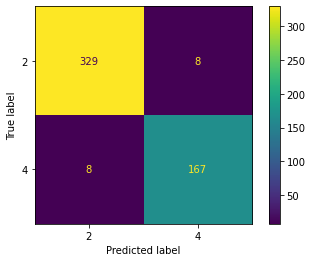

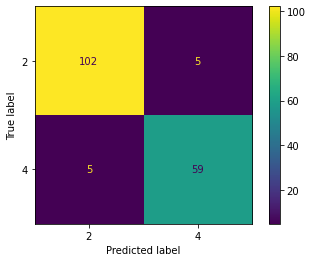

In [8]:
X = data_no_NaN.loc[:, ~data.columns.isin(['ID', 'Class'])]

y = data_no_NaN.Class
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
C = 1 
clf = svm.SVC(kernel='linear', C=C, random_state=1)
clf.fit(X_train, y_train)
y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)
y_pred_test = cross_val_predict(clf, X_test, y_test, cv=5)
conf_mat_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels= ["2","4"])
disp.plot()
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_mat_test, display_labels= ["2","4"])
disp_test.plot()

Task 3:  ROC curves

In [20]:
# Data of Class is converted into Binary Data
df_one = pd.get_dummies(data_no_NaN["Class"])

# Binary Data is Concatenated into df
df_two = pd.concat((df_one, data_no_NaN), axis=1)
df_two = df_two.drop(["Class"], axis=1)
df_two = df_two.drop([2], axis=1)
# Rename the Column
df_binary_Class = df_two.rename(columns={4: "Class"})
X = df_binary_Class.loc[:, ~data.columns.isin(['Class'])]
X = X.drop(columns=["ID"])
y = df_binary_Class.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X

,Class,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Siz,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli
0,0,5,1,1,1,2,1.0,3,1
1,0,5,4,4,5,7,10.0,3,2
2,0,3,1,1,1,2,2.0,3,1
3,0,6,8,8,1,3,4.0,3,7
4,0,4,1,1,3,2,1.0,3,1
...,...,...,...,...,...,...,...,...,...
694,0,3,1,1,1,3,2.0,1,1
695,0,2,1,1,1,2,1.0,1,1
696,1,5,10,10,3,7,3.0,8,10
697,1,4,8,6,4,3,4.0,10,6


In [39]:
def train_svm(X_train, X_test, y_train, y_test, kernel):
    clf_lin = svm.SVC(kernel=kernel, C=C, random_state=1, probability=True)
    clf_lin.fit(X_train,y_train)
    y_pred_lin = clf_lin.predict_proba(X_test)
    lin_fpr, lin_tpr, lin_thresholds = roc_curve(y_test, y_pred_lin[:,1])
    plt.plot(lin_fpr, lin_tpr)
    plt.title('Roc Curves')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    lin_auc = auc(lin_fpr,lin_tpr)
    print(f"The AUC for the {kernel} kernel is: {lin_auc}")
    

The AUC for the linear kernel is: 1.0
The AUC for the rbf kernel is: 0.9929906542056075
The AUC for the sigmoid kernel is: 0.9912383177570093
The AUC for the poly kernel is: 1.0


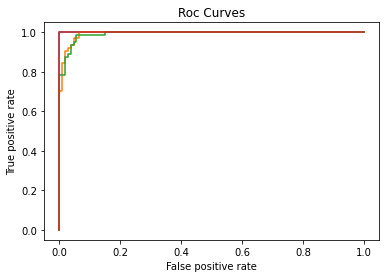

In [40]:
# linear kernel
train_svm(X_train, X_test, y_train, y_test, "linear")
#gaussian kernel
train_svm(X_train, X_test, y_train, y_test, "rbf")
#sigmoid kernel
train_svm(X_train, X_test, y_train, y_test, "sigmoid")
#polynomial kernel
train_svm(X_train, X_test, y_train, y_test, "poly")